<a href="https://colab.research.google.com/github/fmargarit/CoderHouse_DataScience/blob/main/CoderHouse_DataScience_Entrega01_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODERHOUSE
### DATA SCIENCE I - Fundamentos (comision 60935)

*   Profesor:  Jorge RUIZ
*   Tutor:     Diego GASCH
*   Alumno:    Fernando MARGARIT



DATASET: Vehiculos usados en EEUU disponibles para la venta.

OBJETIVO 1: Poder visualmente conocer un precio de venta en caso de contar con un vehiculo usado, considerando Marca, Modelo, Año de Fabricacion, Kilometraje

OBJETIVO 2: Utilizar el dataset para ML y pronosticar su precio de venta


1.   Grafico 1: conocer la cantidad de autos disponibles en el mercado por año de fabricacion y el precio promedio
2.   Grafico 2: distribucion de precios en cada categoria, vizualizando rangos y outliers
3.   Grafico 3: Volumen de vehiculos por las principales Marcas en el mercado de usados
4.   Grafico 4: distribucion de precios en cada marca, vizualizando rangos y outliers











Campos del dataset:


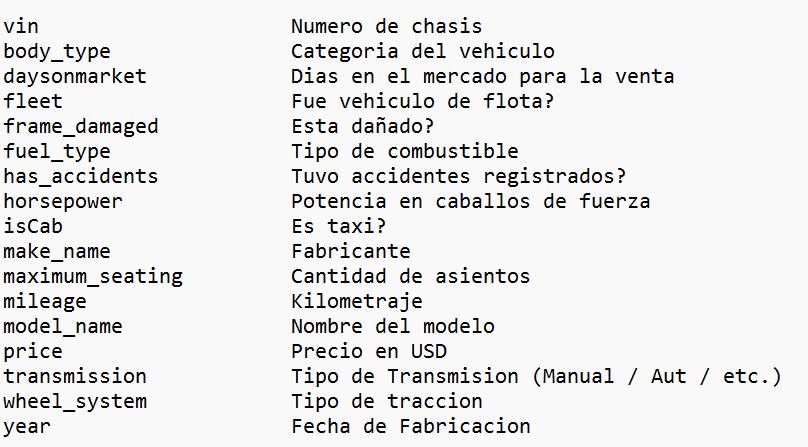

# **HIPOTESIS**

1.   La mayor cantidad de vehiculos usados disponibles para la venta tienen una antiguedad mayor a 5 años

2.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen mas dias promedio en el mercado antes de venderse

3.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios

4.   Las categorias con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios

5.   Vehiculos con motor a Gasolina son los mas ofrecidos

6.   Cuanto mayor es el kilometraje del vehiculo ofrecio, menor su precio

7.   Cuanto mas nuevo es el vehiculo usado, mayor es su precio

8.   Los vehiculos pueden permanecer mas de 100 dias en promedio en el mercado hasta venderse

***Conclusiones al final***








In [1]:
# Importar librerias
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [2]:
# Importar archivo csv (guardado en Google Drive y en GitHub)
from google.colab import drive
import os
#-- drive.mount('/content/drive')
#-- file = '/content/drive/MyDrive/CODERHOUSE/Data Science I/Entrega I/US USED CARS FOR SALES.csv'

git  = 'https://raw.githubusercontent.com/fmargarit/CoderHouse_DataScience/main/US%20USED%20CARS%20FOR%20SALES.csv'

df = pd.read_csv(git)


In [3]:
# conocer la cantidad de filas y columnas del DataFrame
df.shape

(10000, 17)

In [4]:
# cantidad de registros con campos NaN
df.isna().sum()

vin                   0
body_type            36
daysonmarket          0
fleet              3327
frame_damaged      3327
fuel_type           269
has_accidents      3327
horsepower          557
isCab              3327
make_name             0
maximum_seating     517
mileage             308
model_name            0
price                 0
transmission        163
wheel_system        465
year                  0
dtype: int64

In [5]:
# se considera que en los casos de fleet, frame_damaged, has_accidents y isCab el valor NaN corresponde a False

df['fleet'].fillna(False, inplace=True)
df['frame_damaged'].fillna(False, inplace=True)
df['has_accidents'].fillna(False, inplace=True)
df['isCab'].fillna(False, inplace=True)
df.isna().sum()


vin                  0
body_type           36
daysonmarket         0
fleet                0
frame_damaged        0
fuel_type          269
has_accidents        0
horsepower         557
isCab                0
make_name            0
maximum_seating    517
mileage            308
model_name           0
price                0
transmission       163
wheel_system       465
year                 0
dtype: int64

In [6]:
#Borrado de registros NaN

#df['body_type'].dropna(inplace=True)
df.dropna(inplace=True)




In [7]:
df.shape

(8891, 17)

In [8]:
df.isna().sum()

vin                0
body_type          0
daysonmarket       0
fleet              0
frame_damaged      0
fuel_type          0
has_accidents      0
horsepower         0
isCab              0
make_name          0
maximum_seating    0
mileage            0
model_name         0
price              0
transmission       0
wheel_system       0
year               0
dtype: int64

Text(0, 0.5, 'Precio Promedio')

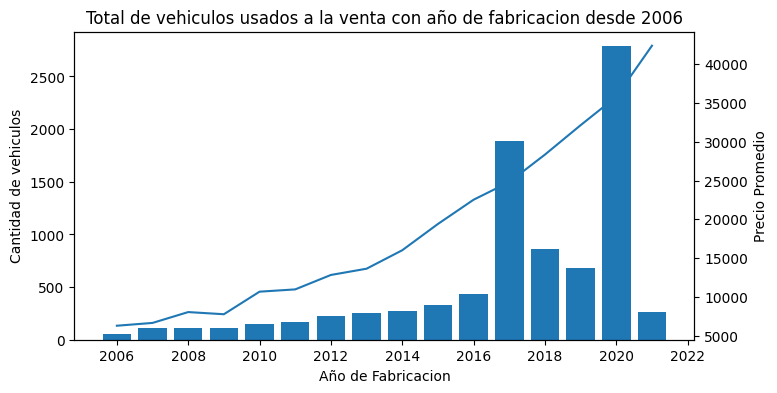

In [9]:
# GRAFICO 1
# Total de vehiculos usados a la venta segun su año de fabricacion incluyendo precio promedio
ventas = ventas = df[df['year'] > 2005].groupby('year').agg({'vin':'count', 'price':'mean'})
ventas.columns = ['Cantidad', 'Precio_Promedio']

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(ventas.index, ventas['Cantidad'])
ax1.set_title('Total de vehiculos usados a la venta con año de fabricacion desde 2006')
ax1.set_ylabel('Cantidad de vehiculos')
ax1.set_xlabel('Año de Fabricacion')

ax2 = ax1.twinx()
ax2.plot(ventas.index, ventas['Precio_Promedio'])
ax2.set_ylabel('Precio Promedio')

Text(0.5, 1.0, 'Vehiculos por Fabricante disponibles en el mercado para la venta')

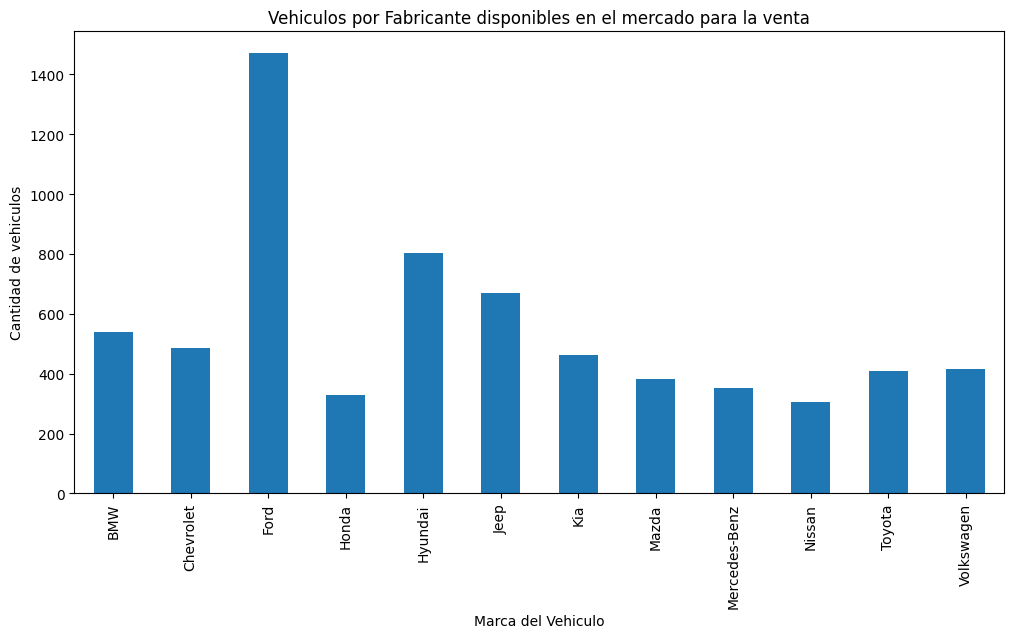

In [17]:
# GRAFICO 2
# Total de vehiculos usados a la venta segun categoria
cant = df.groupby(['make_name']).agg({'vin':'count'})
cant = cant[cant['vin'] > 300]

cant['vin'].plot(kind='bar', figsize=(12,6))
plt.xlabel('Marca del Vehiculo')
plt.ylabel('Cantidad de vehiculos')
plt.title('Vehiculos por Fabricante disponibles en el mercado para la venta')

Text(0.5, 1.0, 'Dias promedio en el mercado por Marca')

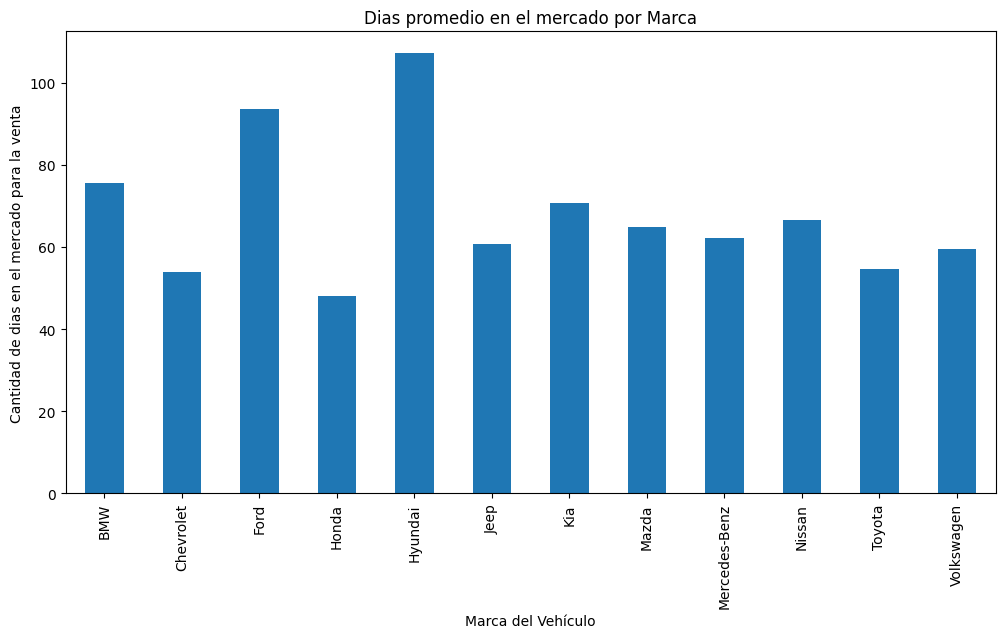

In [23]:
# GRAFICO 3
# Dias promedio en el mercado para venta por Marca
dias = df.groupby(['make_name']).agg({'vin':'count','daysonmarket':'mean'})
dias = dias[dias['vin'] > 300]


dias['daysonmarket'].plot(kind='bar', figsize=(12,6))
plt.xlabel('Marca del Vehículo')
plt.ylabel('Cantidad de dias en el mercado para la venta')
plt.title('Dias promedio en el mercado por Marca')

Text(0.5, 0, 'Categoria del Vehiculo')

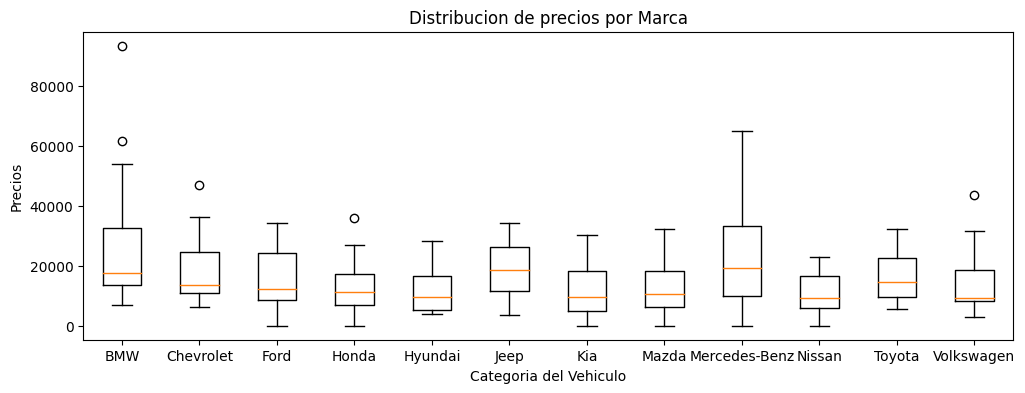

In [19]:
# GRAFICO 4
# Precios por marca de vehiculo

# Agrupar por Marca y cantidad
vta_x_marca = df.groupby('make_name')['vin'].count()

# Filtrar las marcas que tienen más de 300 vehiculos en venta
vta_flitro = vta_x_marca[vta_x_marca > 300].index

# Filtrar el DataFrame original para incluir solo las marcas filtradas
df_vta = df[df['make_name'].isin(vta_flitro)]

# Crear la tabla dinámica
marca = df_vta[df_vta['year'] > 2005].pivot_table(values='price', index='year', columns='make_name', aggfunc='mean')

# Poner en cero los NaN
marca.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(marca , labels=vta_flitro)
ax.set_title('Distribucion de precios por Marca')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')

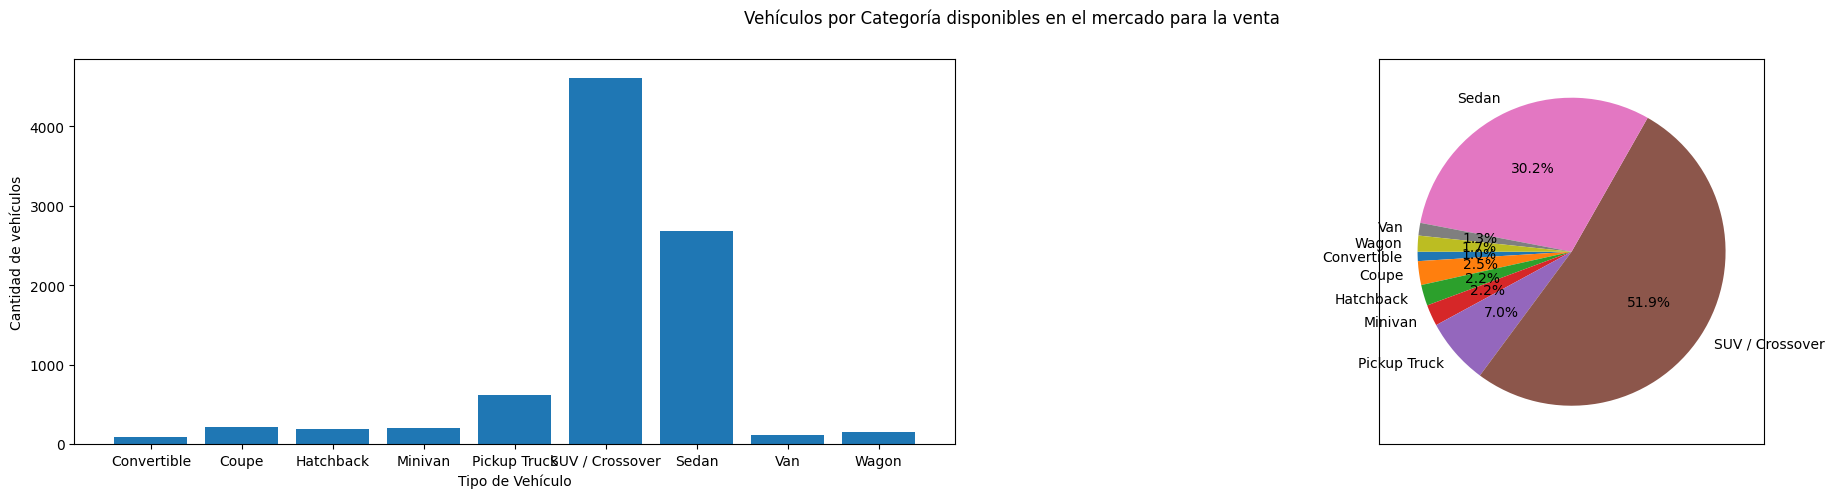

In [46]:
# GRAFICO 5
# Total de vehiculos usados a la venta segun categoria
fig, axs = plt.subplots(nrows=1, ncols=2)

cantidad = df.groupby(['body_type']).agg({'vin':'count'})

axs[0].bar(cantidad.index, cantidad['vin'])
axs[0].figure.set_size_inches(40, 5)
axs[0].set_xlabel('Tipo de Vehículo')
axs[0].set_ylabel('Cantidad de vehículos')

axs[1].pie(cantidad['vin'], labels=cantidad.index, autopct='%1.1f%%', startangle=180, )
axs[1].set_frame_on(True)
axs[1].figure.set_size_inches(25, 5)

fig.suptitle("Vehículos por Categoría disponibles en el mercado para la venta")
plt.show()

Text(0.5, 0, 'Categoria del Vehiculo')

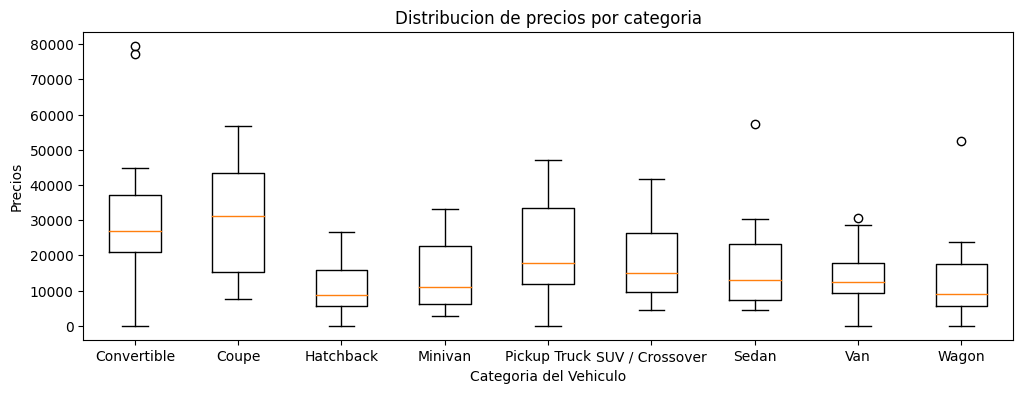

In [47]:
# GRAFICO 6
# Precios por categoria de vehiculo
categoria = df[df['year'] > 2005].pivot_table(values='price', index='year', columns='body_type', aggfunc='mean')
categoria.fillna(0, inplace=True)


fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(categoria, labels=categoria.columns)
ax.set_title('Distribucion de precios por categoria')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')

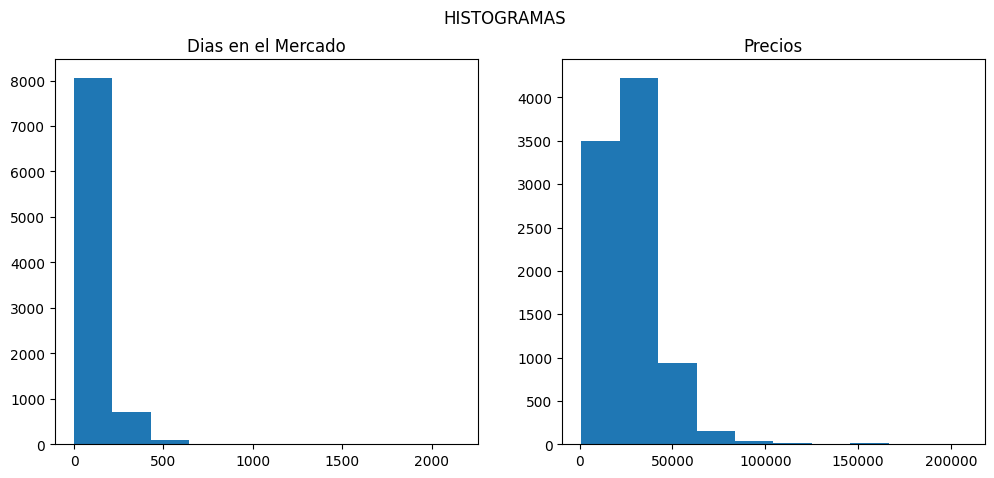

In [48]:
# GRAFICO 7
# Histogramas

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axs[0].hist(data=df, x='daysonmarket',  bins=10)
axs[0].set_title("Dias en el Mercado")

axs[1].hist(data=df, x='price', bins=10)
axs[1].set_title("Precios")

fig.suptitle("HISTOGRAMAS")
plt.show()

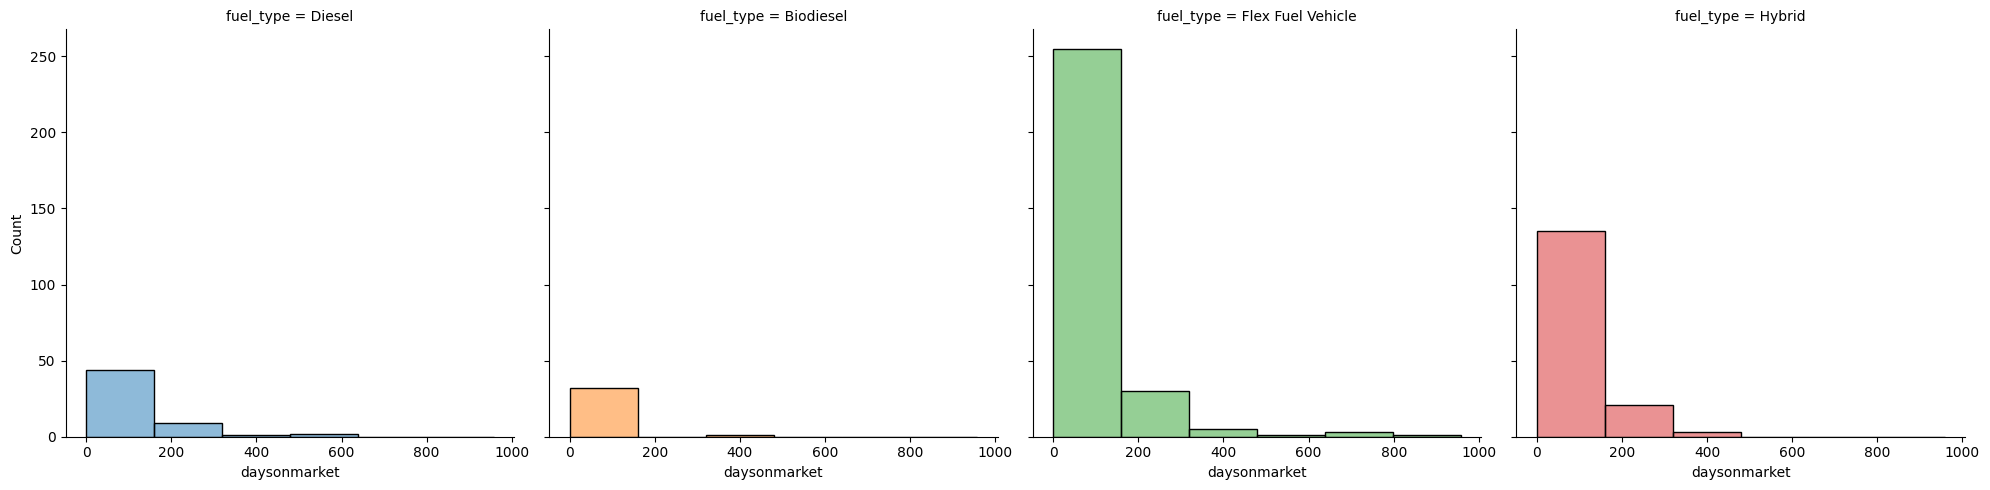

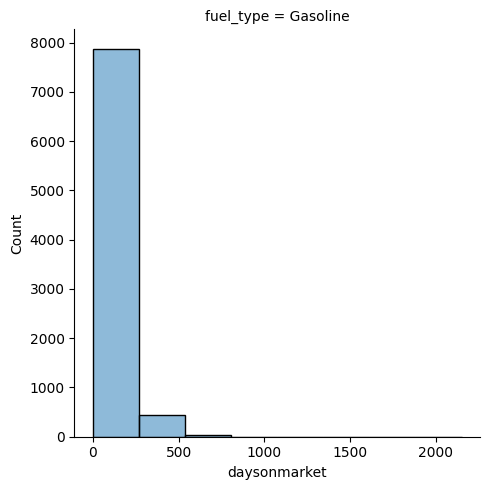

In [49]:
# GRAFICO 8
#Histogramas por tipo de Combustible
df_sin_nafta = df[df['fuel_type'] != 'Gasoline']
df_nafta = df[df['fuel_type'] == 'Gasoline']

sns.displot(data=df_sin_nafta, x='daysonmarket', hue='fuel_type', col='fuel_type', legend=False, bins=6)
sns.displot(data=df_nafta, x='daysonmarket', hue='fuel_type', col='fuel_type', legend=False, bins=8)

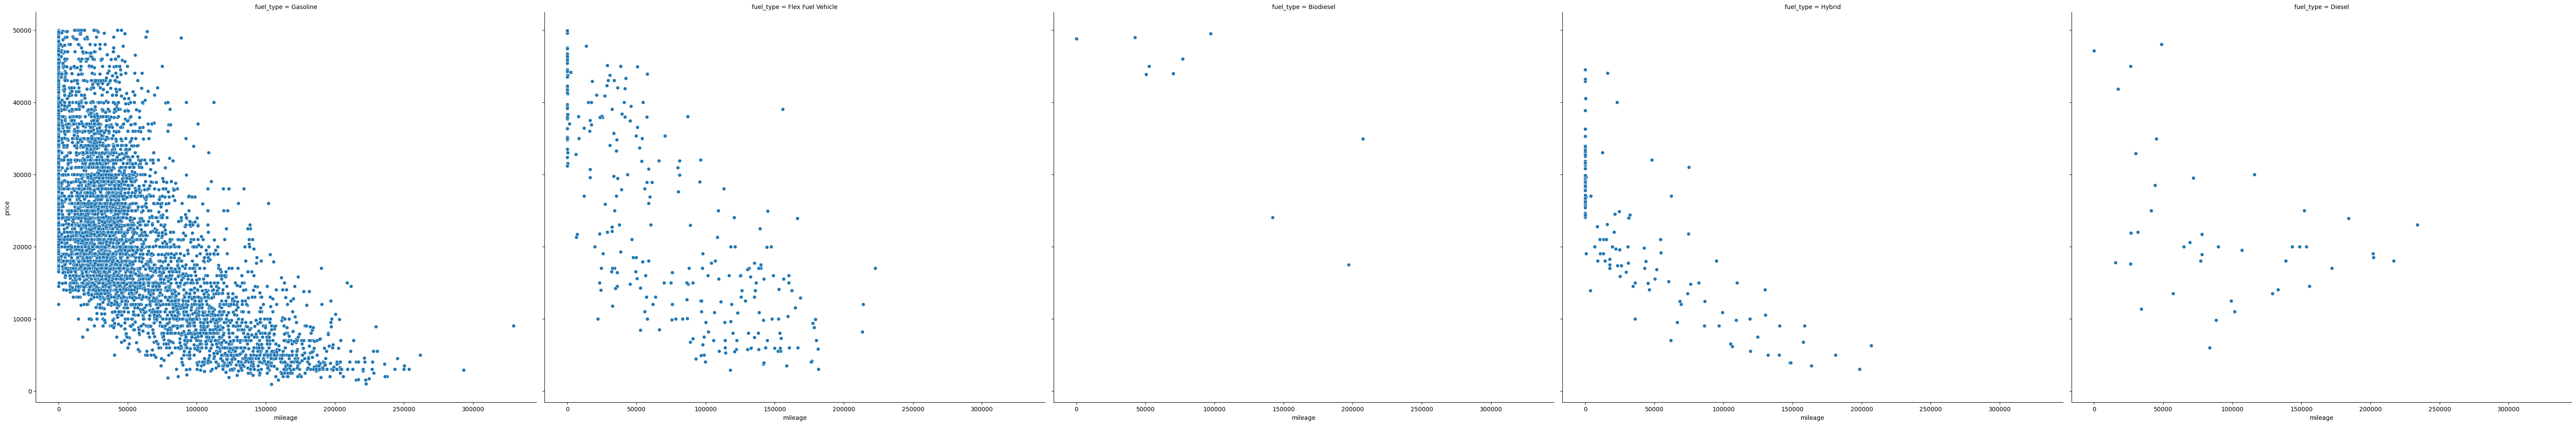

In [53]:
# GRAFICO 9
#SCATTERPLOT por tipo de Combustible - relacion Precio/Kilometraje

dfp = df[df['price'] < 50000]

g = sns.FacetGrid(dfp, col='fuel_type', height=10, aspect=1.2)
g.map(sns.scatterplot, 'mileage', 'price')
plt.show()

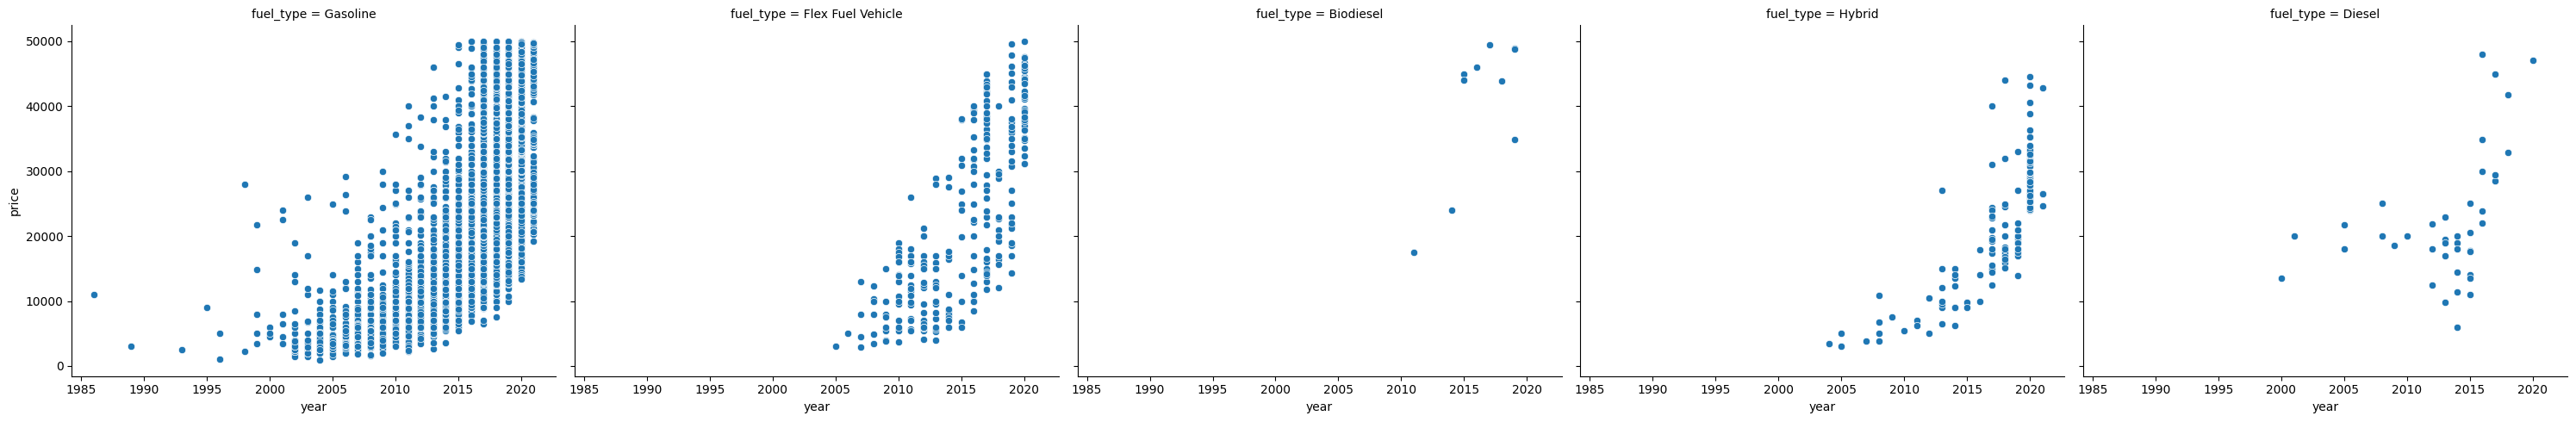

In [54]:
# GRAFICO 10
#SCATTERPLOT por tipo de Combustible - relacion Precio/Fecha Fabricacion

dfp = df[df['price'] < 50000]

g = sns.FacetGrid(dfp, col='fuel_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'year', 'price')
plt.show()

# **CONCLUSIONES**

1.   La mayor cantidad de vehiculos usados disponibles para la venta tienen una antiguedad mayor a 5 años
***FALSO - la mayor cantidad de vehiculos ofrecidos es posterior a 2017 (Grafico 1)***

2.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen mas dias promedio en el mercado antes de venderse
***FALSO - Ford es la marca con mas vehiculos disponibles a la venta pero los vehiculos Hyundai esta mas tiempo para venderse(Grafico 2 y 3)***

3.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios
***FALSO - Ford es la marca con mas vehiculos disponibles a la venta pero los vehiculos de Mercedes-Benz tienen los precios de venta mas dispersos (Grafico 2 y 4)***

4.   Las categorias con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios
***FALSO - La categoria SUV-Crossover es la mas vendida con 52% del mercado pero no es la que tiene mas dispersion de precios. Convertibles y Coupes, con volumenes inferiores, tienen mas amplitud en sus precios (Grafico 5 y 6)***

5.   Vehiculos con motor a Gasolina son los mas ofrecidos
***VERDADERO (Grafico 8)***

6.   Cuanto mayor es el kilometraje del vehiculo ofrecio, menor su precio
***VERDADERO (Grafico 9)***

7.   Cuanto mas nuevo es el vehiculo ofrecio, mayor su precio
***VERDADERO (Grafico 10)***

8.   Los vehiculos pueden permanecer mas de 100 dias en promedio en el mercado hasta venderse
***VERDADERO (Grafico 8)***








# FIN